In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\cwurData.csv")

In [5]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [13]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [7]:
df['year'].value_counts()

2015    1000
2014    1000
2013     100
2012     100
Name: year, dtype: int64

In [26]:
df_2014=df[df['year']==2014]

In [39]:
df_2014.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.195299,0.599191,0.602440,0.573340,0.905481,0.870616,0.826578,0.938793,0.629804,-0.565914,NaN
national_rank,0.195299,1.000000,0.156770,0.084726,0.175268,0.297834,0.106753,0.130071,0.164519,0.124291,-0.176572,NaN
quality_of_education,0.599191,0.156770,1.000000,0.470712,0.696766,0.524470,0.550751,0.532442,0.526383,0.396164,-0.612997,NaN
alumni_employment,0.602440,0.084726,0.470712,1.000000,0.388204,0.466252,0.411454,0.453773,0.430298,0.410360,-0.516014,NaN
quality_of_faculty,0.573340,0.175268,0.696766,0.388204,1.000000,0.534302,0.561509,0.550790,0.547639,0.414953,-0.729051,NaN
publications,0.905481,0.297834,0.524470,0.466252,0.534302,1.000000,0.850849,0.795559,0.917320,0.587176,-0.532438,NaN
influence,0.870616,0.106753,0.550751,0.411454,0.561509,0.850849,1.000000,0.813194,0.918193,0.508547,-0.530202,NaN
citations,0.826578,0.130071,0.532442,0.453773,0.550790,0.795559,0.813194,1.000000,0.854777,0.501941,-0.530054,NaN
broad_impact,0.938793,0.164519,0.526383,0.430298,0.547639,0.917320,0.918193,0.854777,1.000000,0.549453,-0.536053,NaN
patents,0.629804,0.124291,0.396164,0.410360,0.414953,0.587176,0.508547,0.501941,0.549453,1.000000,-0.467902,NaN


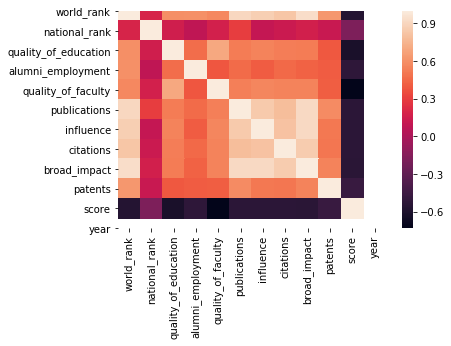

In [42]:
sns.heatmap(df_2014.corr())

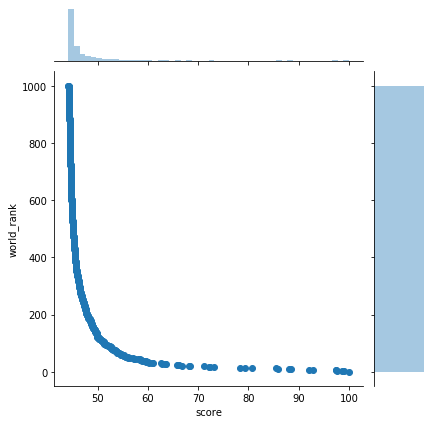

In [28]:
sns.jointplot(x='score',y='world_rank',data=df_2014)

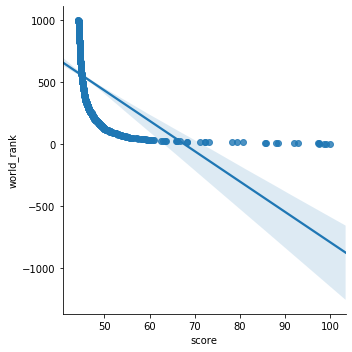

In [29]:
sns.lmplot(x='score',y='world_rank',data=df_2014)

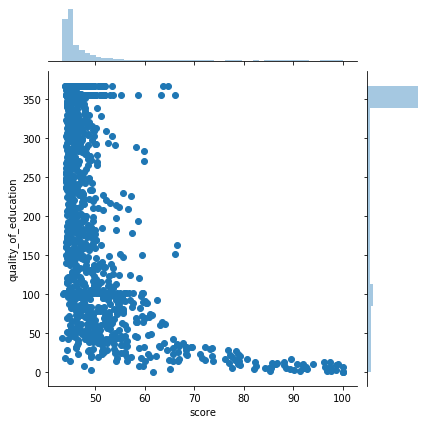

In [12]:
sns.jointplot(x='score',y='quality_of_education',data=df)


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

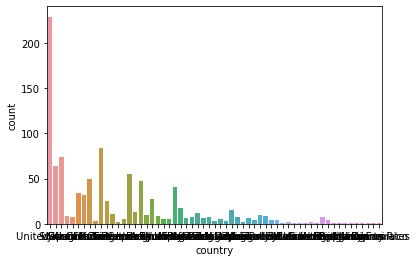

In [30]:
sns.countplot(x='country',data=df_2014)
plt.tight_layout

In [16]:
from sklearn.model_selection import train_test_split

In [34]:
X= df_2014.drop(['institution','country','world_rank','score'],axis=1)
y= df_2014['score']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm= LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
predict= lm.predict(X_test)

In [44]:
print(lm.coef_)

[-0.00474374 -0.00689565 -0.00898688 -0.06718207  0.00135205 -0.00027448
  0.00017967 -0.00218911 -0.00267024  0.        ]


In [45]:
from sklearn import metrics

In [47]:
metrics.mean_absolute_error(y_test,predict)

2.005836761340528

In [50]:
x=metrics.mean_squared_error(y_test,predict)
x

14.827367859179661

In [51]:
np.sqrt(x)

3.850632137608014